$$ \frac{1}{r^2} \frac{d}{dr} r^2 \frac{d}{dr} f(r) \\
= \frac{1}{r^2} \frac{d}{dr} r^2 \frac{df}{dr} \\
= \frac{1}{r^2} \left( 2 r  \frac{df}{dr} +    r^2 \frac{d^2f}{dr^2}    \right) \\
= \frac{2}{r}  \frac{df}{dr} + \frac{d^2f}{dr^2}
$$
$$ \frac{1}{r} \frac{d^2}{dr^2} r f(r) \\
= \frac{1}{r} \frac{d}{dr} \left( f +  r \frac{df}{dr}    \right) \\
= \frac{1}{r} \left( 2 \frac{df}{dr} +  r \frac{d^2f}{dr^2}   \right) \\
= \frac{2}{r} \frac{df}{dr} + \frac{d^2f}{dr^2}
$$

$$
-\frac{1}{2} \frac{1}{r} \frac{d^2}{dr^2} r \psi(r) + \frac{1}{2 r^2} l (l+1) \psi(r) - \frac{Z}{r} \psi(r) = E \psi(r)
$$
$$
 \phi(r) = r \psi(r)
 $$
 $$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) + \frac{1}{2 r^2} l (l+1) \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
 r \in [0,\infty]
$$
$$
  \psi_{0} (r) = \exp(-Z r)
  $$
$$
 \psi(r) = 10^{-10} \implies r > \log(10^{-10}) / Z \approx 2.3*10 / Z 
 $$

In [118]:
# setting up everything we need for the matrices
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import roots_legendre, eval_legendre
import math
L = 8
Z = 1
n = 50
epsilon = 1e-6
roots, weights = roots_legendre(n)
P = np.array([eval_legendre(i, roots) for i in range(n+1)])
dP = np.zeros((n+1, n))
dP[1] = np.ones(n)
for i in range(2,n+1):
    dP[i] = (2*i-1) * P[i-1] + dP[i-2]

In [119]:
overlap_matrix = np.zeros((n,n))
for l in range (n):
    for m in range (n):
        approx_overlap = np.dot(P[l]*P[m], weights)
        if approx_overlap < epsilon:
            approx_overlap = 0
        overlap_matrix[l, m] = approx_overlap
print(overlap_matrix)


[[2.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.4        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.02105263 0.         0.        ]
 [0.         0.         0.         ... 0.         0.02061856 0.        ]
 [0.         0.         0.         ... 0.         0.         0.02020202]]


In [142]:
pe_matrix = np.zeros((n, n))
for l in range (n):
    for m in range (n):
        approx_pe = np.dot(P[l] * P[m]/(1 + roots), weights)
        if approx_pe < epsilon:
            approx_pe = 0
        pe_matrix[l, m] = approx_pe
print (pe_matrix)

[[8.99841068 0.         5.99841068 ... 0.         0.08081633 0.        ]
 [0.         6.99841068 0.         ... 0.12248299 0.         0.04      ]
 [5.99841068 0.         5.99841068 ... 0.         0.08081633 0.        ]
 ...
 [0.         0.12248299 0.         ... 0.12248299 0.         0.04      ]
 [0.08081633 0.         0.08081633 ... 0.         0.08081633 0.        ]
 [0.         0.04       0.         ... 0.04       0.         0.04      ]]


In [121]:
ke_matrix = np.zeros((n, n))
for l in range (n):
    for m in range (n):
        approx_ke = np.dot(dP[l] * dP[m], weights)
        if approx_ke < epsilon:
            approx_ke = 0
        ke_matrix[l, m] = approx_ke
print (ke_matrix)

[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 ... 2.000e+00 0.000e+00 2.000e+00]
 [0.000e+00 0.000e+00 6.000e+00 ... 0.000e+00 6.000e+00 0.000e+00]
 ...
 [0.000e+00 2.000e+00 0.000e+00 ... 2.256e+03 0.000e+00 2.256e+03]
 [0.000e+00 0.000e+00 6.000e+00 ... 0.000e+00 2.352e+03 0.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 ... 2.256e+03 0.000e+00 2.450e+03]]


In [122]:
#obtaining coefficients
phi = lambda r: r * (math.e)**(-Z * r)
c = np.zeros(n)
for l in range(n):
    Pl = eval_legendre(l,roots)
    c[l] = ((2*l+1)/2)*np.dot(phi(L * 0.5 * (roots + 1))*Pl,weights)
print (c)
fit = lambda x : np.dot(eval_legendre(range(n),2 * x/L -1),c)
fit(6),phi(6)

[ 1.24622605e-01 -1.88946683e-01  3.51706094e-02  9.84777062e-02
 -1.17445469e-01  7.68800952e-02 -3.64130203e-02  1.37071337e-02
 -4.30532749e-03  1.16314301e-03 -2.76047212e-04  5.84576323e-05
 -1.11805946e-05  1.95013634e-06 -3.12678246e-07  4.63933577e-08
 -6.40618043e-09  8.27269672e-10 -1.00336176e-10  1.14753736e-11
 -1.24556859e-12  1.31007645e-13 -1.58293941e-14  3.05898283e-15
 -1.44805449e-15 -3.56605106e-16  1.07603423e-15 -2.53700132e-15
  3.16437702e-15 -3.96236338e-15  3.54232397e-15 -2.89996298e-15
  1.33399325e-15 -5.82338328e-16 -1.30537518e-16 -1.81109620e-16
 -4.19740613e-16  1.58205638e-15 -3.46657360e-15  3.36637342e-15
 -2.50728889e-15  4.86923666e-16  9.25441728e-16 -2.15182092e-15
  2.70961541e-15 -3.55087318e-15  4.07331823e-15 -3.58937146e-15
  1.36372042e-15  2.22144671e-15]


(0.014872513059998392, 0.014872513059998156)

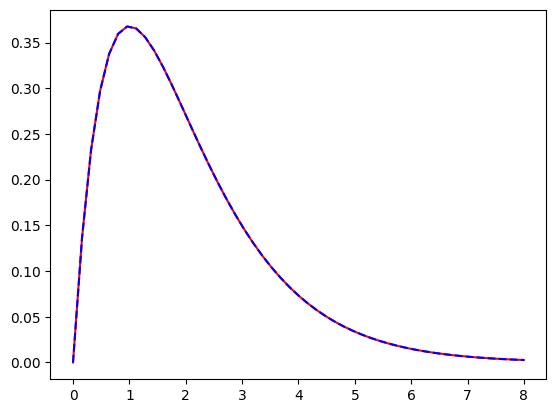

In [123]:
# phi(X) plotted with fit, showing very small error
X = np.linspace(start=0,stop=L,num=51)
F = [fit(x) for x in X]
plt.plot(X,F,"r",X,phi(X),"b--")

In [143]:
# numerical overlap computation
overlap_estimate = np.dot(c, np.dot(overlap_matrix, c)) * L * 0.5
ke_integral = np.dot(c, np.dot(ke_matrix, c)) / L
pe_integral = np.dot(c, np.dot(pe_matrix, c)) * -Z
ke_approx = ke_integral/overlap_estimate
pe_approx = pe_integral/overlap_estimate
energy_approx = ke_approx + pe_approx
print(overlap_estimate)
print(ke_approx, pe_approx, energy_approx)

0.24999592059991615
0.5000018005921485 -0.578851524410967 -0.0788497238188185
